사용자들이 몇 명의 친구를 갖고 있는가?

데이터가 많은 경우, 데이터를 정제해서 중요한 정보만 전달해줄 수 있다.

Counter({1: 22, 6: 22, 3: 20, 4: 20, 9: 18, 2: 17, 5: 17, 7: 15, 10: 15, 8: 13, 13: 4, 15: 4, 12: 2, 14: 2, 18: 2, 19: 2, 21: 2, 11: 1, 16: 1, 25: 1, 40: 1, 41: 1, 49: 1, 100: 1})
[(1, 22), (6, 22), (3, 20), (4, 20), (9, 18), (2, 17), (5, 17), (7, 15), (10, 15), (8, 13)]


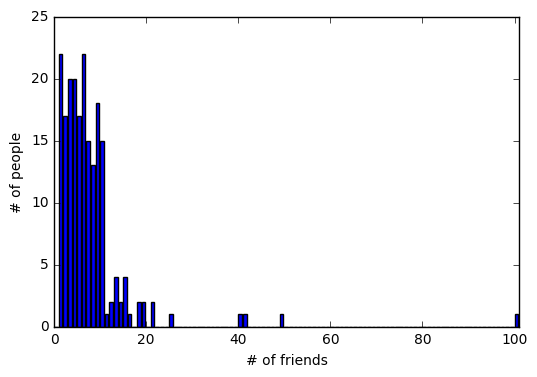

In [27]:
# 일단 사용자 친구 수를 히스토그램으로 표현해보자
from __future__ import division
from collections import Counter
from matplotlib import pyplot as plt

num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

friend_counts = Counter(num_friends)
print friend_counts
print friend_counts.most_common(10)

xs = range(101) # 최대 100명
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [14]:
# 이 데이터를 대표할 수 있는 통계치를 계산해보자
# 데이터 포인트의 개수
num_points = len(num_friends)
print num_points # 친구가 총 204명

largest_value = max(num_friends) # 최대값
smallest_value = min(num_friends) # 최소값
print largest_value
print smallest_value

# 최대값과 최소값은 정렬된 리스트의 특정 위치를 조회하는 것으로도 구할 수 있다
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
largest_value = sorted_values[-1]
print largest_value
print smallest_value

204
100
1
100
1


### 중심 경향성

데이터의 중심이 어디 있는지를 나타내는 중심 경향성(central tendency) 지표는 매우 중요하다.  
대부분의 경우, 이 값으로 평균(average 또는 mean)를 사용한다.  
가끔은 중앙값(median)이 필요한 경우도 있다.

In [18]:
def mean(x):
    return sum(x) / len(x)

print mean(num_friends) # 평균 친구 수

# 중앙값도 찾아보자
# 데이터 개수가 홀수라면 중앙의 값, 짝수라면 중앙에 있는 두 데이터 포인트의 평균
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint # 반올림되므로 midpoint는 큰 값이다
        return (sorted_v[lo] + sorted_v[hi]) / 2

print median(num_friends) # 중앙값

7.33333333333
6.0


평균은 중앙값보다 계산하기 간편하며, 데이터가 바뀌었을 때 값의 변화도 부드럽다.  
하지만 이상치에 매우 민감하다. 이상치가 현상을 제대로 나타내고 있지 않은 나쁜 데이터라면, 오히려 평균이 잘못된 정보를 줄 수 있다.

In [30]:
# 분위는 중앙값을 포함하는 개념인데, 데이터의 특정 백분위보다 낮은 값을 의미한다
# 중앙값은 상위 50%의 데이터보다 작은 값
def quantile(x, p):
    """x의 p분위에 속하는 값을 반환"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print int(3.7) # int는 소수점을 버린다

print quantile(num_friends, 0.1) # 상위 10%의 친구 수 = 1
print quantile(num_friends, 0.25)
print quantile(num_friends, 0.5) # 상위 50%의 친구 수 = 6
print quantile(num_friends, 0.75)
print quantile(num_friends, 0.90) # 상위 90%의 친구 수 = 13

# 최빈값(데이터에서 가장 자주 나오는 값)을 살펴보는 경우도 있다
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems() # 값이 여러 개일 수도 있기 때문에 전체 개수를 살펴본다
           if count == max_count]

print mode(num_friends)

3
1
3
6
9
13
[1, 6]


### 산포도 (dispersion)

산포도는 데이터가 얼마나 퍼져 있는지를 나타낸다.  
보통 0과 근접한 값이면 데이터가 거의 퍼져 있지 않다는 의미이고, 큰 값이면 매우 펴져있다는 것을 의미하는 통계치이다.  

산포도를 측정하는 방법으로는 범위(range), 분산(variance), 표준편차(standard deviation), 분위의 차를 구하는 방법 등이 있다.

In [45]:
def data_range(x):
    return max(x) - min(x)

print data_range(num_friends) # 가장 큰 값과 작은 값의 차이

x = [0, 0, 0, 100, 100, 100]
y = [0, 50, 50, 50, 50, 100]

# y에 비해 x가 더 퍼져있다는 느낌이 들지만, 범위의 값은 동일하다 
print data_range(x)
print data_range(y)

# 분산을 구해보자
def de_mean(x):
    """편차(평균으로부터의 차이)를 구한다"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def dot(v, w):
    return sum(v_i * w_i
              for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)
    # (n-1)로 나눈다. 편차의 제곱합을 n으로 나누면 bias 때문에 모분산에 대한 추정값이 실제 모분산보다 작게 계산되는 것을 보정하기 위함이다.

print '분산:', variance(num_friends) # 81.54

# 분산의 단위는 기존 데이터 단위의 제곱이기 때문에, 직관적인 비교를 위해 표준편차를 이용할 때가 많다
import math
def standard_deviation(x):
    return math.sqrt(variance(x))

print '표준편차:', standard_deviation(num_friends) # 9 -> 친구 수가 평균에서 9명 정도 차이남

# 표준편차도 이상치에 민감하게 반응하는 문제가 있다.
# 더 안정적인 방법은 상위 25%에 해당하는 값과 하위 25%에 해당되는 값의 차이를 구하는 것이다
def interquartile_range(x):
    """사분위수 값의 차를 구한다"""
    return quantile(x, 0.75) - quantile(x, 0.25)

print '상위 25% - 하위 25%:', interquartile_range(num_friends) # 6

99
100
100
분산: 81.5435139573
표준편차: 9.03014473623
상위 25% - 하위 25%: 6


### 상관관계 (Correlation)

'사용자가 사이트에서 보내는 시간과 사용자의 친구 수 사이에 연관성이 있다'는 가설을 검증할 수 있을까?

In [47]:
# 각 사용자가 하루에 보내는 시간
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

# 공분산 (covariance)
# 분산이 하나의 변수가 변수의 평균에서 얼마나 멀리 떨어져 있는지 계산한다면,
# 공분산은 두 변수가 각각의 평균에서 얼마나 멀리 떨어져있는지 살펴본다
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1) # (각각의 편차의 곱의 합)의 평균

print '공분산:', covariance(num_friends, daily_minutes)

공분산: 22.4254351396


공분산이 양수이면, x의 값이 클수록 y의 값이 크고,  
음수이면, x의 값이 클 수록 y의 값이 작아진다는 것을 의미한다.  
공분산이 0이면 그런 관계가 존재하지 않는다는 것을 의미한다.  

하지만, 공분산의 단위는 입력 변수의 단위들을 곱해서 계산하기 때문에 이해하기 쉽지 않다.  
(예를 들어, 친구 수 X 하루 사용량(분)의 단위는 무엇을 의미하는 걸까?)  

또한, 하루 사용량은 변하지 않고 친구 수만 두 배로 되었다면, 공분산 또한 두 배로 증가할 것이다.  
그렇지만 두 변수의 상관관계는 변하지 않았다. 즉, 값이 얼마나 커야 공분산이 크다고 판단하기 어렵다.  

이런 이유로, **공분산에서 각각의 표준편차를 나눠 준 상관관계**를 더 자주 살핀다.

In [61]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # 편차가 존재하지 않으면 0

print '상관관계:', correlation(num_friends, daily_minutes)

상관관계: 0.247369573665


상관관계는 단위가 없으며, 항상 -1(완벽한 음의 상관관계)과 1(완벽한 양의 상관관계) 사이의 값을 갖는다.  
예를 들어, 상관관계가 0.25라면 상대적으로 약한 양의 상관관계를 의미한다.

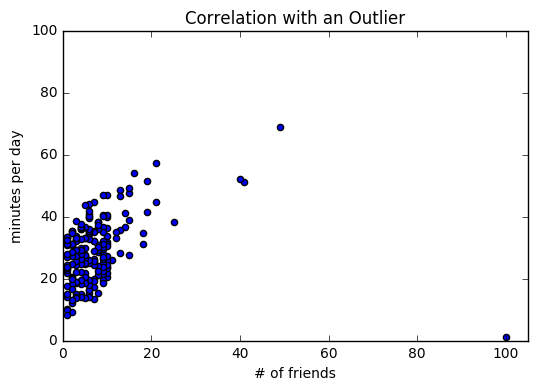

In [67]:
# 사용자와 사용시간의 상관관계를 산포도로 살펴보자
plt.scatter(num_friends, daily_minutes)
plt.axis([0, 105, 0, 100])
plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

그래프의 우측 상단을 보면, 100명의 친구가 있지만 하루에 1분만 사이트를 이용하는 사용자가 있다.  
이 데이터는 분명히 이상치라고 볼 수 있다. 이 사용자를 제외해보면 어떨까?

In [63]:
outlier = num_friends.index(100) # 이상치(친구가 100명인 사용자)의 인덱스
num_friends_good = [x
                   for i, x in enumerate(num_friends)
                   if i != outlier]
daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]
print '상관관계:', correlation(num_friends_good, daily_minutes_good)

상관관계: 0.573679211567


이상치를 제거하니 더 강력한 상관관계를 볼 수 있다.  
그래프로도 확인해보자.

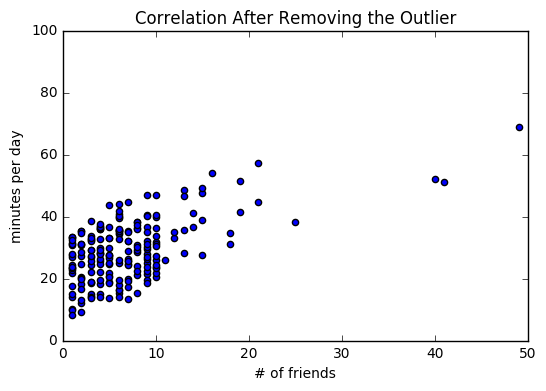

In [71]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.axis([0, 50, 0, 100])
plt.title("Correlation After Removing the Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

### 심슨의 역설

데이터 분석을 하다보면 혼재변수(confounding variables)가 누락되어 상관관계가 잘못 계산되는 심슨의 역설(Simpson's paradox)을 흔히 직면하게 된다.

예를 들어, 동부와 서부의 데이터 과학자의 평균 친구 수가 있다고 해보자.

| 지역 | 사용자 수 | 평균 친구 수 |
|---|---|---|
| 서부 | 101명 | 8.2명 |
| 동부 | 103명 | 6.5명 |

확실히 서부의 과학자가 친구가 더 많고 사교적으로 보인다.  
서부의 화창한 날씨, 혹은 커피나 친환경 음식, 아니면 느긋한 서부 특유의 문화 때문일까?

하지만 데이터를 더 살펴보니 흥미로운 점을 발견했다. 박사 학위가 있는 사용자만 한장적으로 보면 동부에 있는 과학자가 더 친구가 많았다.

| 지역 | 학위 | 사용자 수 | 평균 친구 수 |
|---|---|---|---|
| 서부 | 박사 | 35 | 3.1 |
| 동부 | 박사 | 70 | 3.2 |
| 서부 | 기타 | 66 | 10.9 |
| 동부 | 기타 | 33 | 13.4 |

사용자의 학위를 고려하면 상관관계가 반대로 변하는 것을 확인할 수 있다.  
사용자를 동부, 서부로 나누면서 동부 지역의 사용자 대다수가 박사라는 정보가 생략되어 버린 것이다.

중요한 것은 **상관관계는 다른 모든 것이 동일할 때 두 변수의 관계를 나타낸다**는 것이다.  
만약 실험을 잘 설계해서 데이터의 레이블을 무작위로 설정했다면, '다른 모든 것이 동일'하다는 가정은 잘 맞는 것이다.  
하지만 만약 데이터의 레이블에 어떤 패턴이 존재한다면, '다른 모든 것이 동일'하다는 가정은 성립되지 않을 것이다.  

이 문제를 피하는 유일한 방법은 데이터를 이해하고 변수에 영향을 주는 모든 요인을 확인하는 것이다.  
물론, 모든 요인을 확인하는 것이 항상 가능한 것이 아니기 때문에, 부족한 정보로 결론을 내릴 수 밖에 없을 수도 있다.

### 상관관계에 대한 추가적인 경고 사항


In [75]:
# 상관관계가 0이라는 것은 두 변수 사이에 선형적인 관계가 없다는 것을 의미한다
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]

# x와 y는 절대값이라는 관계를 가지고 있지만, 상관관계로 연관성을 살펴보는 방식으로는 설명할 수 없다.
print correlation(x, y) # 0

x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

# x와 y는 완벽히 연관되어 있지만, 상관관계로 연관성이 얼마나 크고 작은지는 설명할 수 없다.
print correlation(x, y) # 1

0.0
1.0


### 상관관계와 인과관계

*상관관계는 인과관계를 의미하지 않는다(correlation is not causation)*라는 말이 있다.  

만약 x와 y가 강한 상관관계를 보인다면 x가 y를 발생시켰거나, y가 x를 발생시켰다고 볼 수도 있다. 혹은 서로가 서로를 동시에 발생시키거나, 다른 외부 요인이 발생시키거나, 아니면 아무런 인과관계가 없을 수도 있다.  

인과관계를 확인해보는 방법 중에는, 사용자를 비슷한 조건과 성질의 두 그룹으로 나누고 한 그룹에만 다른 요인을 적용해보는 방법이 있다.


